# Waveguides 

Overview:

1. What is a Waveguide?
2. Index of Refraction, reflection coefficients, and total internal reflection
    - Total Internal Reflection code demo?
3. Polarization overview
    - TE vs TM waves
4. Waveguide modelling
    - Waveguide code demo?
    - geometric and frequency dependencies
4. Waveguide Modes
    - Effective indices of modes
    - monomodes, assymetries
    - Mode profiles?
    - Slab Waveguides



## What is a Waveguide?

Traditional circuits transmit electrical signals via traces, which are typically made of a conductive material like copper. Photonic circuits transmit light signals via waveguides. Waveguides are used to guide light signals to different parts of photonic circuits. Waveguides can also be used to transmit light signals over very long distances. Waveguides used in photonic circuits typically have a rectangular shape, whereas waveguides used for long distance transmission have a round shape.

A simple waveguide consists of two parts: a core with a high index of refraction, and a material with a low index of refraction that surrounds the core (known as a "cladding"). One of the most popular waveguides in photonic circuits is the Silicon on Insulator (SOI) waveguide. SOI waveguides are favored for their ease of manufacture. A silicon core, with a refractive index of ~3.47, is clad with silicon dioxide, which has a refractive index of ~1.44.




## A Review of Total Internal Reflection

The indices of refraction for the core material and cladding material of a waveguide are chosen such that total internal reflection can be achieved for a specific optical frequency. When a light wave propagating in a first material strikes a second material, a portion of the light wave reflects off the boundary between the first and second material, while the rest of the light wave goes through the boundary. The portion of the light wave that reflects off the boundary is called the reflected wave, and the portion that goes through the boundary is called the transmitted wave.

The magnitude of the reflected and transmitted waves, along with the angles of reflection and transmission, are dependent on the refractive indices of the two materials, along with the incident angle of the light wave. The angles of reflection and transmission (also known as refraction) can be determined using Snell's law. The magnitudes of the reflected and transmitted waves are the products of the incident wave magnitude and the reflection and transmission coefficients respectively. The reflection and transmission coefficients can be calculated using the Fresnel Equations.

The python code below demonstrates the principle of oblique reflection and transmission. The red vector represents the propagation of the incident wave. The green vector represents the propagation of the reflected wave, and the blue vector represents the propagation of the transmitted wave. The refractive indices of the first and second material are set to 1 (the refractive index of air) and 2, the indices that correspond to an SOI waveguide. The boundary between the two materials is represented by the axis x = 0. Material 1 is represented by the area x < 0, and material 2 is represented by the area x > 0. Experiment by changing the incident angle. Observe how the angles of the reflected wave and transmitted wave change when the incident angle changes.

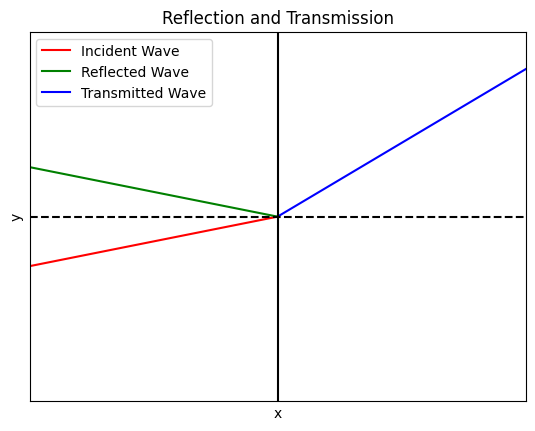

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Define incident angle (in degrees)
incident_angle = 15

#Convert incident angle to radians
incident_angle_radians = np.deg2rad(incident_angle)

#Define indices of refraction for material 1 and material 2
n1 = 3.47
n2 = 1.44

#Calculate the reflected and transmitted angles
reflected_angle = -1 * incident_angle_radians
transmitted_angle = np.arcsin((n1 * np.sin(incident_angle_radians)) / n2)

#Create vectors for the incident wave, reflected wave, and transmitted wave
incident_wave = np.array([-5, -5 * np.tan(incident_angle_radians)])
reflected_wave = np.array([-5, -5 * np.tan(reflected_angle)])
transmitted_wave = np.array([5, 5 * np.tan(transmitted_angle)])

#Critical Angle Calculation
display_transmitted = True
if incident_angle_radians > np.arcsin(n2/n1):
    display_transmitted = False

#Create Plot
fig, axis = plt.subplots()

#Add vectors to plot
axis.plot([incident_wave[0],0],[incident_wave[1],0],color='red', label='Incident Wave')
axis.plot([reflected_wave[0],0],[reflected_wave[1],0],color='green', label='Reflected Wave')
if display_transmitted:
  axis.plot([0,transmitted_wave[0]],[0,transmitted_wave[1]],color='blue', label='Transmitted Wave')

#Add barriers to plot
axis.axvline(0,color='black')
axis.axhline(0,color='black', linestyle ='--')

#Window, label, and display plot
axis.set_xlim([-5, 5])
axis.set_ylim([-5, 5])
axis.set_xlabel('x')
plt.xticks([])
plt.yticks([])
axis.set_ylabel('y')
axis.set_title('Reflection and Transmission')
axis.legend()
plt.show()

Notice how any incident angle greater than 24 degrees returns a runtime error. When an incident angle is greater than the critical angle, no portion of the incident wave is transmitted as the transmitted wave. In these cases, all of the wave is reflected back, a case called "Total Internal Reflection."